<a href="https://colab.research.google.com/github/paulo-lins/EDA_datasus/blob/main/EDA_tabnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Through **DATASUS** (site: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def) we will access Hospital Production data, by region and federation unit, since 2008 and we will analyze the total amount spent on health by the federal government. We will search for this data through **TABNET**, a portal available on the website above. In our dataframe we will use the year and month of processing, which is when the values ​​are processed and passed on to the manager or hospital institution.

This notebook contains the exploratory analysis of data from "Datasus" from the year 2008 to the last year of processing available on the website above.

In [1]:
import pandas as pd


In [2]:
# IIn Brazil sometimes we will have to use encoding='ISO-8859-1' for Latin characters

url = 'https://raw.githubusercontent.com/paulo-lins/EDA_datasus/main/A173927189_28_143_208.csv'

# df1 = pd.read_csv(url, encoding='ISO-8859-1') *

# this returns us ------> ParserError                               
# Traceback (most recent call last)
# <ipython-input-3-de3887ba5c9c> in <module>()
#      3 url = 'https://raw.githubusercontent.com/paulo-lins/EDA_datasus/main/A173927189_28_143_208.csv'
#      4 
#----> 5 df1 = pd.read_csv(url, encoding='ISO-8859-1')

#8 frames
#/usr/local/lib/python3.7/dist-packages/pandas/_libs/parsers.pyx in pandas._libs.parsers.raise_parser_error()

#ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 174

In [3]:
# Atention, (ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 174), 
# this error is related to some problem reading the data. As header and what kind of separator... in this case it's set to ',' but when we open the file we observe that it is separated by ';'

In [36]:
tabnet_data = pd.read_csv(url, 
                  encoding='ISO-8859-1',
                  skiprows=3,     #skip unnecessary lines
                  skipfooter=12,  #skip unnecessary footer
                  sep=';',        #set the separator
                  thousands='.',   #set the thousand to '.'
                  decimal=',')    #set the decimal to ','
tabnet_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,13054440.15,12112418.95,9765323.52,11091614.20,11206618.94,11050292.93,12371950.02,11554081.53,9895887.03,1168339075.47
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,4138751.64,4260017.06,3828566.34,2889654.47,3138245.58,3547361.84,3424337.76,3584824.97,-,499963323.36
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,22720450.82,21120609.03,16901290.05,18371952.43,17783646.65,15403023.75,17984992.03,19409055.43,17572660.38,2189227062.50
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3781921.16,3150835.05,3185551.53,3022781.41,3129225.29,3024454.61,3097211.89,3328597.91,3266805.71,374600917.06
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,45126860.59,45771568.39,45038864.11,44566789.75,44358065.42,44802364.31,44554060.25,42076801.20,43170314.35,5311264998.18


In [10]:
#show the last 5 lines
tabnet_data.tail() 

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,137549257.39,122943615.91,114704433.96,115169141.61,114399256.81,102761718.25,105941190.18,108223787.41,103246325.57,14390214497.44
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,36713343.08,33140371.78,23996334.39,24343257.72,22003059.87,22022167.51,24047535.49,24476864.75,20695521.11,2680511644.74
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,38962080.83,29287201.72,27910621.61,21563518.42,20311161.96,20692335.99,22338343.91,20019006.23,16076544.64,2539254310.99
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,72461729.24,67292141.67,58382787.45,43461823.92,44730257.88,45417197.27,41309258.19,40609636.12,38726340.65,5702548126.87
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,27288766.94,28509985.96,26207429.15,25147458.57,22742916.21,24945761.01,24404092.99,26033330.63,25430770.37,2953368375.70


In [11]:
# let's calculate the average caste per month in each state. For this we will use the mean, but first, we will change all
tabnet_data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2021/Dez     58145101.08
2022/Jan     57885315.71
2022/Fev     58022827.57
2022/Mar     57548111.74
Total      7268224369.78
Length: 171, dtype: float64

In [12]:
# It is a little difficult to understand the numbers above. For this, we will use pd.options.float = "{:.2f}".format
pd.options.display.float_format = "{:.2f}".format
tabnet_data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2021/Dez     58145101.08
2022/Jan     57885315.71
2022/Fev     58022827.57
2022/Mar     57548111.74
Total      7268224369.78
Length: 171, dtype: float64

In [13]:
# When we access the data like showed bellow, the python return a series
tabnet_data["2008/Ago"]


0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [15]:
# A series also has a mean function
tabnet_data["2008/Ago"].mean()

27800320.306666665

**Now, we will make a graphic for this month and year (August, 2008) for each state**

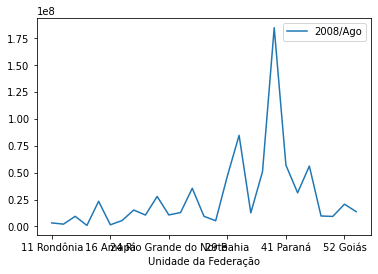

In [18]:
# we can see that using lines in this case is not the best choice to understand what we want to show
tabnet_data.plot(x='Unidade da Federação', y="2008/Ago")

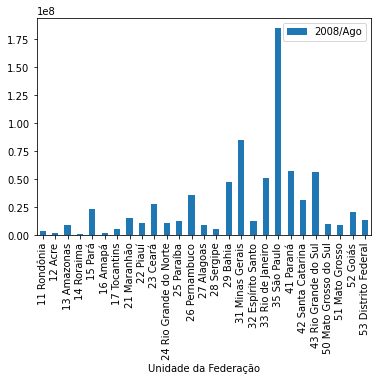

In [19]:
# We can do better using the parameter kind='bar'. It will show a vertical bar plot.
tabnet_data.plot(x='Unidade da Federação', y="2008/Ago", kind='bar')

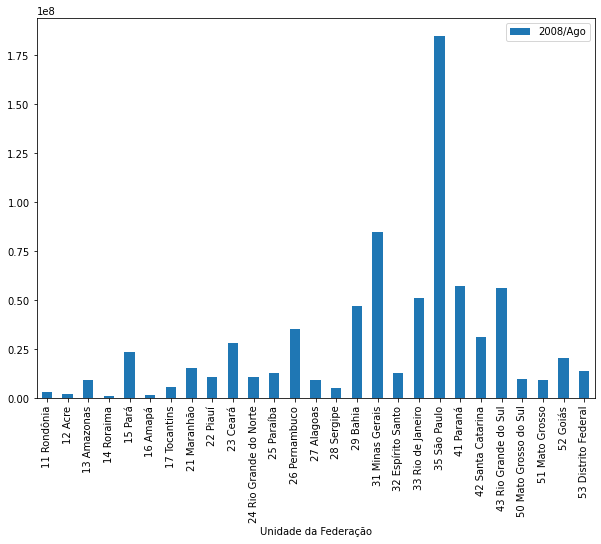

In [20]:
# We can change the size using the parameter figsize
tabnet_data.plot(x='Unidade da Federação', y="2008/Ago", kind='bar', figsize=(10,7))

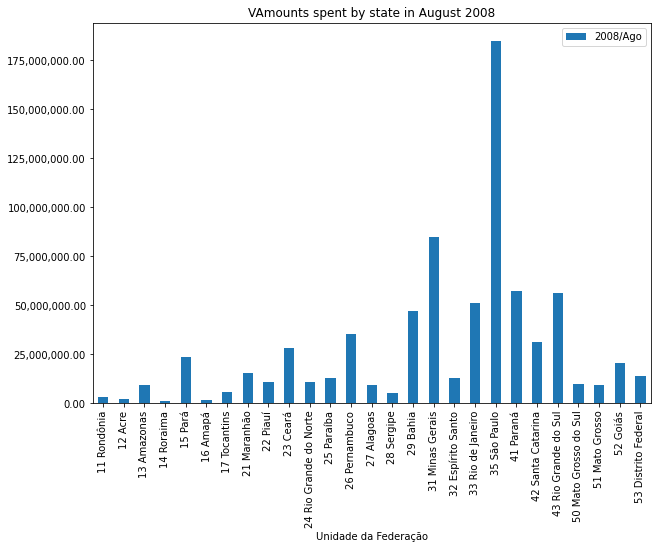

In [35]:
# For improve our graphic, we use the matplotlib. Python Matplotlib is a library of the Python programming language, used for data visualization and graphic plotting. With matplotlib we can do more things like to format a values on y axis

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = tabnet_data.plot(x='Unidade da Federação', y="2008/Ago", kind='bar', figsize=(10,7)) # ax is the abbreviation for axis
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) # Here, we're formatting for thousands with ',' and decimals with '.'

plt.title("Amounts spent by state in August 2008"); # using ';' at the end is the same that using plt.show()




Now we will do the same analysis for the most recent month and year

Text(0.5, 1.0, '"Amounts spent by state in March 2022"')

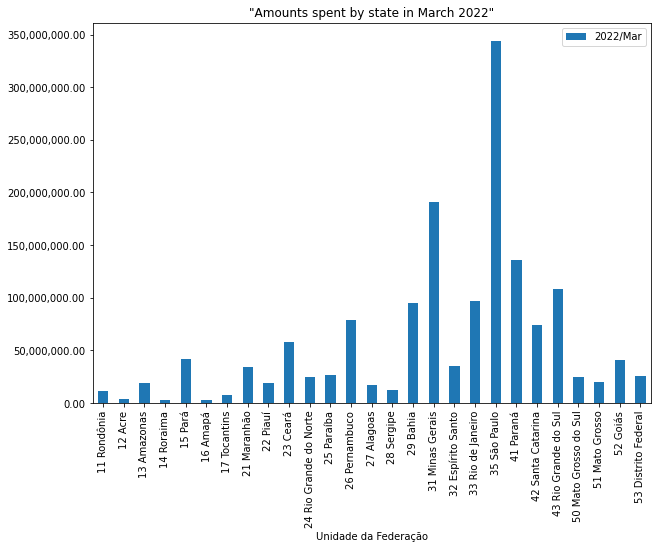

In [44]:
# the most recent mont and year with all informations in our dataframe is 2022/Mar

ax = tabnet_data.plot(x='Unidade da Federação', y="2022/Mar", kind="bar", figsize=(10,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('"Amounts spent by state in March 2022"')